In [2]:
import pandas as pd 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
data=pd.read_sas("annexe_8.sas7bdat",format = 'sas7bdat', encoding="utf-8")
data

,Pays,code,Markup,desc
0,aus,10-12,1.13,"Food products, beverages and tobacco"
1,bel,10-12,1.06,"Food products, beverages and tobacco"
2,esp,10-12,1.11,"Food products, beverages and tobacco"
3,fin,10-12,1.11,"Food products, beverages and tobacco"
4,fra,10-12,1.17,"Food products, beverages and tobacco"
...,...,...,...,...
647,fra,TOT,1.27,TOTAL INDUSTRIES
648,ger,TOT,1.30,TOTAL INDUSTRIES
649,ita,TOT,1.40,TOTAL INDUSTRIES
650,nld,TOT,1.29,TOTAL INDUSTRIES


In [60]:
data = data.drop_duplicates(subset=['Pays', 'code'])
data

,Pays,code,Markup,desc
0,aus,10-12,1.13,"Food products, beverages and tobacco"
1,bel,10-12,1.06,"Food products, beverages and tobacco"
2,esp,10-12,1.11,"Food products, beverages and tobacco"
3,fin,10-12,1.11,"Food products, beverages and tobacco"
4,fra,10-12,1.17,"Food products, beverages and tobacco"
...,...,...,...,...
638,fra,TOT,1.27,TOTAL INDUSTRIES
639,ger,TOT,1.30,TOTAL INDUSTRIES
640,ita,TOT,1.40,TOTAL INDUSTRIES
641,nld,TOT,1.29,TOTAL INDUSTRIES


In [61]:
data_1=pd.read_sas("Finale_8.sas7bdat",format = 'sas7bdat', encoding="utf-8")
data_1.head()

,desc,code,id_country,t,Y,X
0,"Food products, beverages and tobacco",10-12,aus,1996.0,-0.014560,-0.047455
1,"Food products, beverages and tobacco",10-12,aus,1997.0,-0.004390,0.059966
2,"Food products, beverages and tobacco",10-12,aus,1998.0,0.010607,-0.019898
3,"Food products, beverages and tobacco",10-12,aus,1999.0,0.015410,-0.006652
4,"Food products, beverages and tobacco",10-12,aus,2000.0,-0.005484,0.019715


In [62]:
data_group = data.groupby('Pays').mean()
data_group.head() 

,Markup
Pays,
aus,1.320750
bel,1.268000
esp,1.326970
fin,1.295000
fra,1.318286


<AxesSubplot:xlabel='code', ylabel='Markup'>

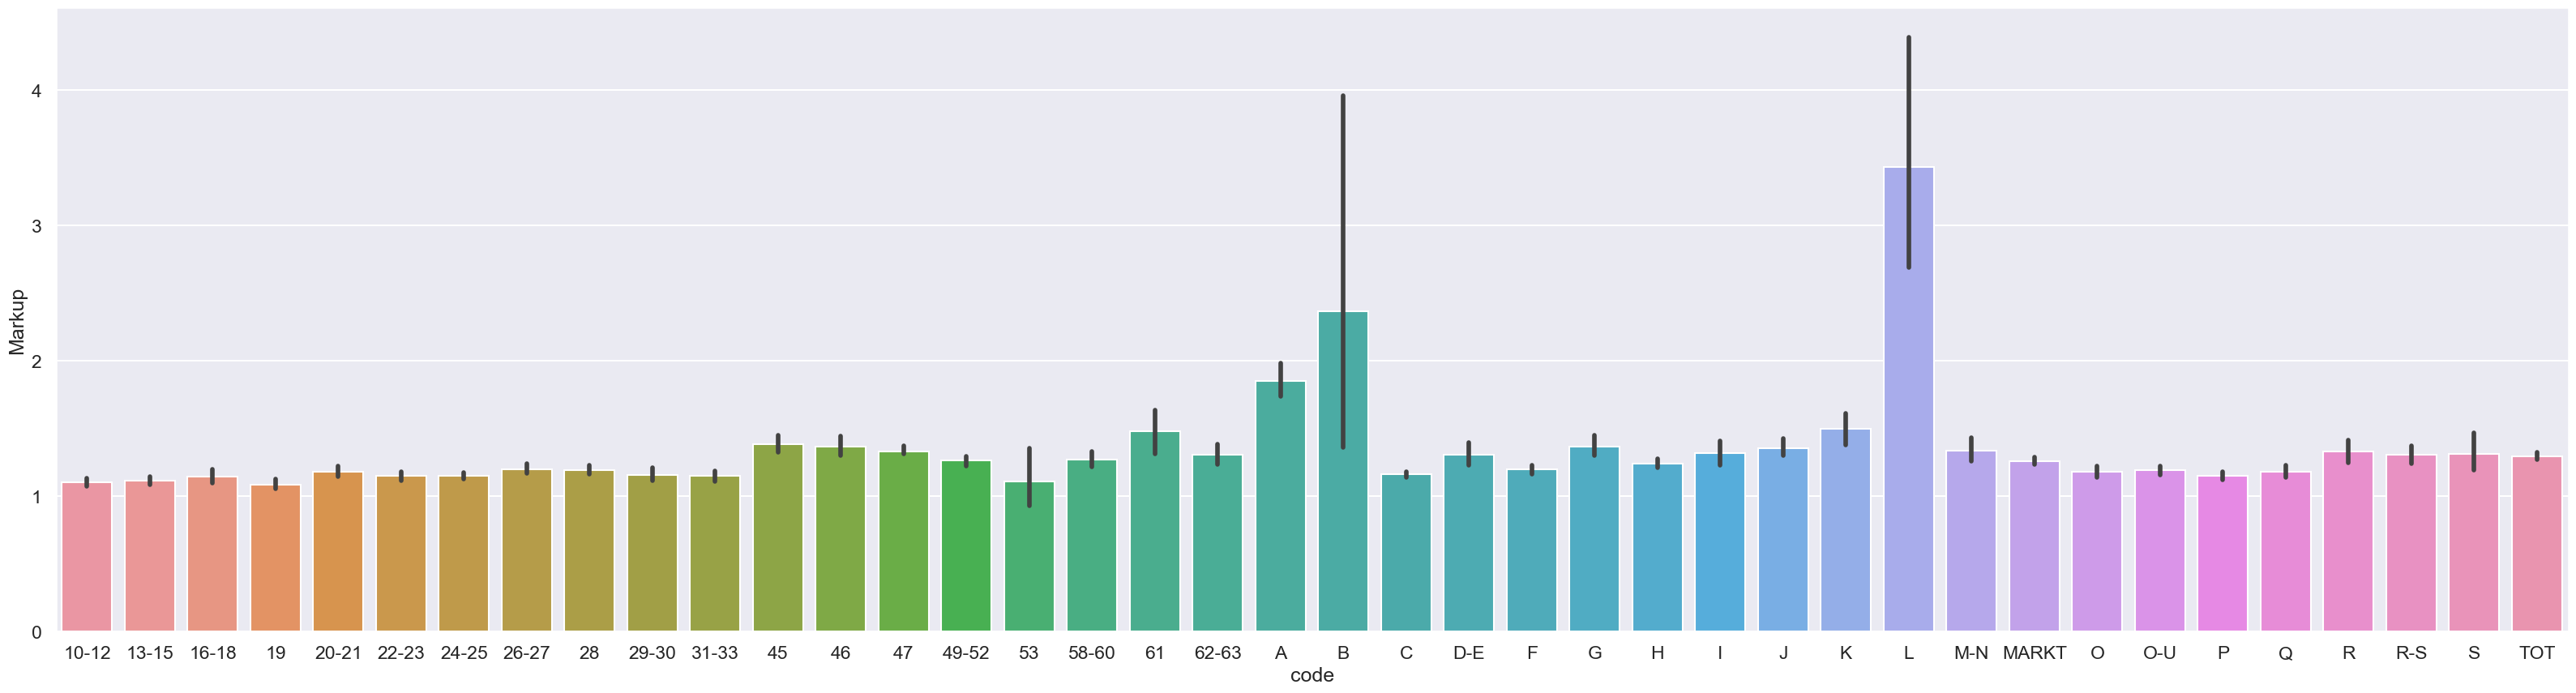

In [63]:
sns.set('talk', rc={'figure.figsize': (40, 10)})
sns.barplot(x='code', y='Markup', data=data)

In [26]:
import statsmodels.api as sm

In [33]:
y = data_1['Y']
X = data_1['X']
 # Add a constant term to the independent variable
model = sm.OLS(y, X)

In [34]:
groups = data_1.groupby(['id_country', 'code'])

In [50]:
coefficients = []
for name, group in groups:
    y = group['Y']
    X = group['X']
    
    model = sm.OLS(y, X)
    model = model.fit(cov_type='HC3', use_t=True)
    
    # Extract the coefficients and add them to the list
    params = model.params.to_dict()
    params['id_country'] = name[0]
    params['code'] = name[1]
    coefficients.append(params)

# Convert the list of coefficients to a Pandas DataFrame
Markup = pd.DataFrame(coefficients)

# Print the coefficients DataFrame
print(Markup)

            X id_country   code
0    0.116618        aus  10-12
1    0.097421        aus  13-15
2    0.131854        aus  16-18
3    0.106844        aus     19
4    0.079951        aus  20-21
..        ...        ...    ...
321  0.088230        usa      Q
322  0.227366        usa      R
323  0.116401        usa    R-S
324  0.080058        usa      S
325  0.220579        usa    TOT

[326 rows x 3 columns]


In [53]:
Markup['Markup'] = 1 / (1 - Markup['X'])

# Round the markup to two decimal places
Markup['Markup'] = Markup['Markup'].round(2)

Markup

,X,id_country,code,Markup
0,0.116618,aus,10-12,1.13
1,0.097421,aus,13-15,1.11
2,0.131854,aus,16-18,1.15
3,0.106844,aus,19,1.12
4,0.079951,aus,20-21,1.09
...,...,...,...,...
321,0.088230,usa,Q,1.10
322,0.227366,usa,R,1.29
323,0.116401,usa,R-S,1.13
324,0.080058,usa,S,1.09


In [48]:
data_group=data_group.reset_index()

In [49]:
data_group

,Pays,Markup
0,aus,1.320750
1,bel,1.268000
2,esp,1.326970
3,fin,1.295000
4,fra,1.318286
5,ger,1.317714
6,ita,1.540571
7,nld,1.491143
8,usa,1.266579


In [64]:
data['Pays'].unique()

array(['aus', 'bel', 'esp', 'fin', 'fra', 'ger', 'ita', 'nld', 'usa'],
      dtype=object)

<AxesSubplot:>

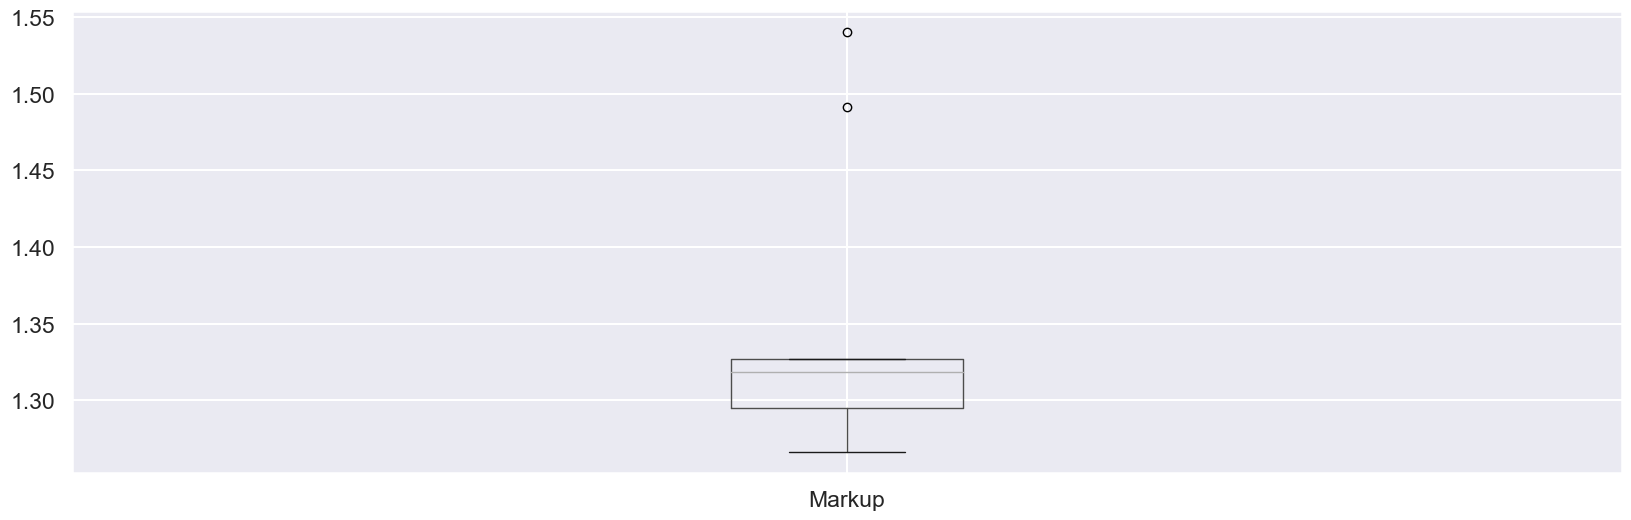

In [53]:
data_group.boxplot()

In [54]:
ns.distplot(data_group['Markup'],hist=True, color = 'blue',hist_kws={'edgecolor':'black'})

NameError: name 'ns' is not defined

<AxesSubplot:xlabel='Pays', ylabel='Markup'>

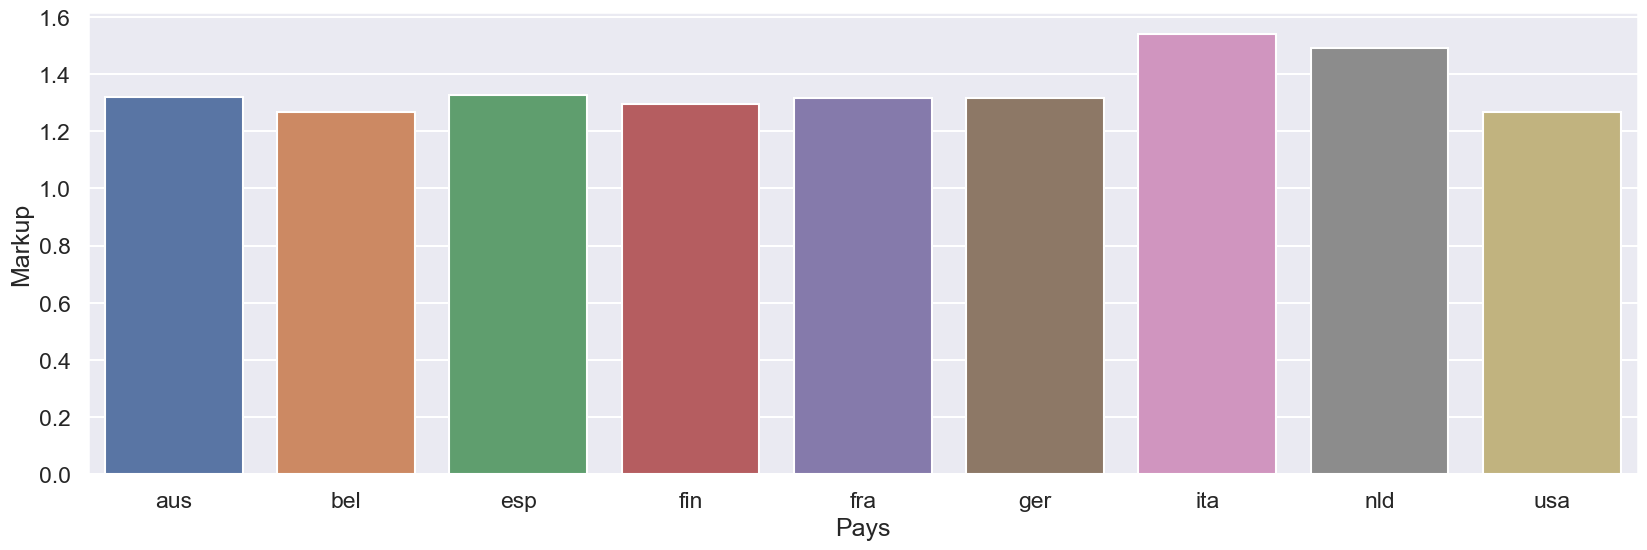

In [50]:
sns.set('talk', rc={'figure.figsize': (20, 6)})
sns.barplot(x='Pays', y='Markup', data=data_group)

In [65]:
import plotly.express as px


In [ ]:


# Create a subset of the data that includes only the countries in Europe and the USA
subset = data[data['Pays'].isin(['USA', 'Canada', 'Mexico', 'France', 'Germany', 'Italy', 'Spain', 'UK'])]

# Group the data by country and calculate the number of data points in each country
counts = subset.groupby('country')['value'].count().reset_index()
counts.columns = ['country', 'count']

# Create the choropleth map
fig = px.choropleth(counts, locations='country', locationmode='country names',
                    color='count', scope=['usa', 'europe'],
                    color_continuous_scale='Blues', title='Data points by country')
fig.show()

In [69]:
ounts = data.groupby('code')['Markup'].count().reset_index()
ounts

,code,Markup
0,10-12,18
1,13-15,18
2,16-18,18
3,19,18
4,20-21,18
5,22-23,18
6,24-25,18
7,26-27,18
8,28,18
9,29-30,18
